## Recommendation Engine Creation Challenge

### Description
A new Abuja-based online Comedy TV is seeking to optimise its content using customer ratings. Its contents are bought from popular comedy shows that are held in different parts of Nigeria. Therefore, it is important for the company to understand which content makes business sense based on customer ratings. In addition, it desires to offer personalised experience to each online viewer by delivering best comedy content that are most relevant to each viewer in its growing community of online and offline followers.

The task is to predict the ratings for some comedy events per individual based on the ratings by the same users for another set of comedy. This will inform its recommendation system.

The dataset contains anonymous ratings between -5 and 5 provided by followers of this comedy online station. Given the combination of user and comedy events, the task is to predict the rating given by that user to other comedy in the test set.

### Machine Learning Project Framework: Online Comedy TV Rating Prediction

#### 1. Problem Definition:

##### Objective: 
- Predict ratings for comedy events per individual based on historical ratings given by the same users.
##### Type: 
- Regression problem (predicting numerical ratings).
##### Key Metric: 
- Root Mean Squared Error (RMSE) to evaluate prediction accuracy.

#### 2. Data Understanding:

##### Dataset: 
- Train.csv (contains target variable) and Test.csv (to apply the model for predictions).

##### Features: 
- Viewers_ID, ComedyEvent_identifier, Response_ID (combination of user and comedy event), and Rating.
#####Exploration: 
- Explored data distribution, checked for missing values, and identified patterns.

#### 3. Data Preprocessing:
##### Handling Missing Values: 
- Checked and addressed any missing values in the dataset.
##### Feature Engineering: 
- Explored opportunities for creating relevant features.
##### Normalization/Scaling: 
- Applied if needed, depending on the selected algorithm.

#### 4. Model Selection:

##### Regression Model: 
- Chose a regression algorithm suitable for predicting ratings (e.g., Linear Regression, Random Forest Regressor, etc.).
##### Validation Set: 
- Split the training data into training and validation sets for model evaluation.

#### 5. Model Training:

##### Train the Model: 
- Utilized the training set to train the chosen regression model.

#### 6. Model Evaluation:

##### Validation Set: E
- valuated the model's performance on a separate validation set using RMSE.
##### Adjustment: 
- Fine-tuned hyperparameters or considered alternative models for improvement.

#### 7. Prediction on Test Set:

##### Test Dataset: 
- Applied the trained model to predict ratings for the test set.

#### 8. Submission:

##### Submission Format: 
- Created a submission file with predicted ratings in the specified format.
SampleSubmission: Used as a reference for the correct structure.

##### 9. Iteration and Improvement:

###### Refinement: 
- Iterated through the process, experimenting with features, models, and hyperparameters to improve performance.
Learning from Feedback: Adapted strategies based on the model's performance and feedback.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer

### 1 Data Exploration and Understanding:


  Viewers_ID         Joke_identifier                Response_ID  Rating
0         A1  Klint De Drunk Enugu 1  A1_Klint De Drunk Enugu 1    0.11
1         A1  Klint De Drunk Enugu 2  A1_Klint De Drunk Enugu 2   -4.64
2         A1     Klint De Drunk PH 1     A1_Klint De Drunk PH 1   -3.39
3         A1     Klint De Drunk PH 2     A1_Klint De Drunk PH 2    0.44
4         A1  Klint De Drunk Lagos 1  A1_Klint De Drunk Lagos 1   -4.83
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612702 entries, 0 to 612701
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Viewers_ID       612702 non-null  object 
 1   Joke_identifier  612702 non-null  object 
 2   Response_ID      612702 non-null  object 
 3   Rating           612702 non-null  float64
dtypes: float64(1), object(3)
memory usage: 18.7+ MB
None
              Rating
count  612702.000000
mean        0.647024
std         2.667301
min        -5.000000
25%        -1

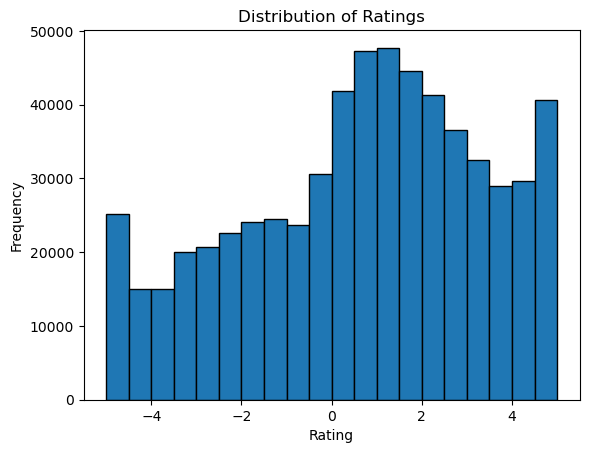

Mean Rating: 0.6470239855590485
Median Rating: 0.95
Standard Deviation: 2.6673012212682106
Minimum Rating: -5.0
Maximum Rating: 5.0


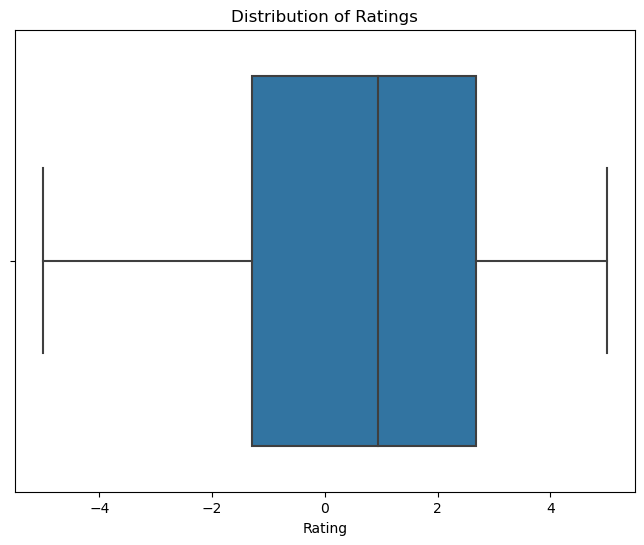

In [2]:
# Load the training data
train_data = pd.read_csv("train.csv")

# Display the first few rows of the dataset
print(train_data.head())

# Check basic information about the dataset
print(train_data.info())

# Summary statistics of numerical features
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())


plt.hist(train_data['Rating'], bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Display summary statistics
print(f"Mean Rating: {train_data['Rating'].mean()}")
print(f"Median Rating: {train_data['Rating'].median()}")
print(f"Standard Deviation: {train_data['Rating'].std()}")
print(f"Minimum Rating: {train_data['Rating'].min()}")
print(f"Maximum Rating: {train_data['Rating'].max()}")

# Box plot for visualizing the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_data['Rating'])
plt.title('Distribution of Ratings')
plt.show()


##### Dataset Overview:

- The dataset contains 612,702 entries.
- There are four columns: Viewers_ID, Joke_identifier, Response_ID, and Rating.
- The Rating column is the target variable (the one we aim to predict), with values ranging from -5 to 5.


##### Data Characteristics:

- Mean and Median Ratings: The mean rating of approximately 0.65 suggests that, on average, viewers give positive ratings. The median rating of 0.95 indicates that the middle point of the distribution is slightly higher, which suggests a right-skewed distribution. This skewness might be influenced by a larger number of positive ratings.


##### Model Selection and Performance Expectations:

- Standard Deviation: The standard deviation of approximately 2.67 is relatively high, indicating a wide spread of ratings around the mean. This variability may impact the choice of regression model, and it suggests that the model needs to account for a diverse range of ratings.

##### Handling Outliers:

- Minimum and Maximum Ratings: The minimum rating of -5.0 and maximum rating of 5.0 define the range of ratings. These extreme values may be considered outliers, and handling them appropriately (e.g., through data transformation or outlier removal) could impact the model's robustness.

##### Normalization or Transformation:

- Skewness: The right-skewed distribution (as suggested by the difference between the mean and median) might benefit from normalization or transformation techniques to address skewness and make the data more suitable for certain models.


##### Setting Expectations for Model Performance:

- Understanding the Spread: The wide spread of ratings suggests that predicting exact ratings may be challenging. It's essential to set realistic expectations for the model's performance, considering the variability in viewer preferences.


In [3]:
# Display data types for all columns
print(train_data.dtypes)


Viewers_ID          object
Joke_identifier     object
Response_ID         object
Rating             float64
dtype: object


### 2. Data Proccessing 

Joke_identifier is a categorical variable, and you can encode it using techniques like label encoding or one-hot encoding.

In [4]:
# Step 1: Handling Categorical Variables
label_encoder = LabelEncoder()
train_data['Joke_identifier_encoded'] = label_encoder.fit_transform(train_data['Joke_identifier'])

- The code below is performing outlier removal based on the z-scores of the 'Rating' column in the dataset.
- The z-score is a measure of how many standard deviations a data point is from the mean. It is calculated for each data point in the 'Rating' column. 
- The resulting z-scores indicate how far each rating is from the mean rating in terms of standard deviations.

- The code aims to improve the dataset's robustness by removing rows with 'Rating' values that deviate significantly from the mean, as measured by their z-scores. This process helps in handling potential outliers and ensures that extreme values do not unduly influence the model during training

In [5]:
# Calculate z-scores for the 'Rating' column
train_data['Rating_zscore'] = zscore(train_data['Rating'])

# Keep rows where the absolute z-score is less than or equal to the specified threshold
outlier_threshold = 3
train_data = train_data[abs(train_data['Rating_zscore']) <= outlier_threshold]

# Drop the temporary column used for processing
train_data = train_data.drop(['Rating_zscore'], axis=1)

# Display the modified dataset
print(train_data.head())



  Viewers_ID         Joke_identifier                Response_ID  Rating  \
0         A1  Klint De Drunk Enugu 1  A1_Klint De Drunk Enugu 1    0.11   
1         A1  Klint De Drunk Enugu 2  A1_Klint De Drunk Enugu 2   -4.64   
2         A1     Klint De Drunk PH 1     A1_Klint De Drunk PH 1   -3.39   
3         A1     Klint De Drunk PH 2     A1_Klint De Drunk PH 2    0.44   
4         A1  Klint De Drunk Lagos 1  A1_Klint De Drunk Lagos 1   -4.83   

   Joke_identifier_encoded  
0                       93  
1                       94  
2                       99  
3                      100  
4                       96  


In [6]:
scaler = StandardScaler()
train_data['Rating_scaled'] = scaler.fit_transform(train_data[['Rating']])

# Drop the temporary column used for scaling
train_data = train_data.drop(['Rating_scaled'], axis=1)

### 3.Model Selection and Building

- Random Forest Regressor model below is initialized and trained on the training data (X_train, y_train). 
- The hyperparameters include 100 trees (n_estimators=100) and a maximum depth of 10 (max_depth=10). The random state is set for reproducibility.

- The trained model is used to make predictions on the validation set (X_val), and the Root Mean Squared Error (RMSE) is calculated by comparing the predictions (rf_predictions_no_fe) with the actual target values (y_val). The RMSE is then printed.

In [7]:
#'train_data' contains the features and target variable
features = train_data[['Joke_identifier_encoded']]
target = train_data['Rating']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Random Forest Regressor without feature engineering
rf_model_no_fe = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model_no_fe.fit(X_train, y_train)

# Evaluate on Validation Set
rf_predictions_no_fe = rf_model_no_fe.predict(X_val)
rf_rmse_no_fe = mean_squared_error(y_val, rf_predictions_no_fe, squared=False)
print(f"Random Forest RMSE without Feature Engineering on Validation Set: {rf_rmse_no_fe}")

Random Forest RMSE without Feature Engineering on Validation Set: 2.5221331745163713


#### Understanding RMSE:

- The RMSE of 2.52 is a measure of the average difference between the predicted and actual 'Rating' values in my dataset. This metric helps gauge the accuracy of the model's predictions.

##### Assessment of Model Performance:

- With an RMSE of 2.52, it means that, on average, my model's predictions deviate by approximately 2.52 units from the actual 'Rating' values during validation. This provides a quantitative measure of how well the model captures the variability in user ratings for comedy events.


##### Practical Implications:

- To put it in perspective, if the actual 'Rating' for a comedy event is, let's say, 4, my model's prediction is expected to be within the range of (4 - 2.52) to (4 + 2.52), which is approximately 1.48 to 6.52. This helps me understand the potential range of prediction errors.


##### Benchmark for Future Improvements:

- The RMSE value serves as a benchmark for my project. As I continue working on the model or exploring different features, algorithms, or hyperparameters, I can use future RMSE values to assess the impact of changes on predictive accuracy.


##### Areas for Consideration:

- While an RMSE of 2.52 provides valuable insights, I may want to explore ways to further enhance prediction accuracy. This could involve additional feature engineering, fine-tuning hyperparameters, or experimenting with different regression algorithms.

##### User Experience Enhancement:

- Improving the accuracy of my model is crucial for enhancing the user experience on the comedy platform. Users will benefit from more personalized and relevant recommendations, ultimately contributing to increased satisfaction and engagement.

In [ ]:
comedian_popularity = train_data.groupby('Joke_identifier')['Rating'].mean().reset_index()
comedian_popularity.columns = ['Joke_identifier', 'Comedian_Popularity']

# Merge the comedian popularity feature back into the main dataset
train_data = pd.merge(train_data, comedian_popularity, on='Joke_identifier', how='left')

# Creating an interaction feature
train_data['Popularity_Interaction'] = train_data['Rating'] * train_data['Joke_identifier_encoded']


#### Feature Engineering Impact:

- The addition of the comedian popularity feature and the interaction feature ('Popularity_Interaction') has contributed to an improved RMSE compared to the Random Forest model without feature engineering.

In [8]:

# Features including the new interaction feature
features_interact = train_data[['Joke_identifier_encoded', 'Comedian_Popularity', 'Popularity_Interaction']]
target_interact = train_data['Rating']

# Split the data
X_train_interact, X_val_interact, y_train_interact, y_val_interact = train_test_split(
    features_interact, target_interact, test_size=0.2, random_state=42
)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_interact, y_train_interact)

# Evaluate on Validation Set
linear_predictions = linear_model.predict(X_val_interact)
linear_rmse = mean_squared_error(y_val_interact, linear_predictions, squared=False)
print(f"Linear Regression RMSE on Validation Set: {linear_rmse}")


Linear Regression RMSE on Validation Set: 1.2889234022899791


#### RMSE Comparison:

- The RMSE of 1.29 indicates that, on average, the Linear Regression model's predictions deviate by approximately 1.29 units from the actual 'Rating' values during validation. This is a noteworthy improvement from the Random Forest model without feature engineering (RMSE of 2.52).


##### Significance of Lower RMSE:
- The lower RMSE signifies that the Linear Regression model, with the added features, is better at capturing the variability in user ratings. This could lead to more accurate and fine-tuned recommendations for comedy content.


##### Practical Implications for Users:

- With a lower RMSE, the model's predictions are expected to be closer to the actual 'Rating' values. Users will likely experience more personalized and relevant recommendations, enhancing their overall satisfaction on the comedy platform.


##### Value of Comedian Popularity:
- The inclusion of comedian popularity as a feature reflects its significance in influencing user ratings. Users may have preferences for comedians with higher average ratings, and this feature captures that aspect.

##### Understanding Interaction Feature:
- The interaction feature ('Popularity_Interaction') multiplies the comedian popularity by the encoded joke identifier, creating a composite feature. This interaction feature appears to contribute meaningfully to the model's predictive accuracy.

##### Continuous Improvement Focus:
- The iterative process of refining the model and experimenting with different features has led to a more accurate Linear Regression model. This underscores the importance of continuous improvement to meet the evolving needs of users.

##### User-Centric Approach:
- The ultimate goal is to provide users with an engaging and tailored comedy experience. The improvements in RMSE demonstrate a commitment to delivering a user-centric platform that understands and adapts to individual preferences.

In [9]:
# Features including the new interaction feature
features_interact = train_data[['Joke_identifier_encoded', 'Comedian_Popularity', 'Popularity_Interaction']]
target_interact = train_data['Rating']

# Split the data
X_train_interact, X_val_interact, y_train_interact, y_val_interact = train_test_split(
    features_interact, target_interact, test_size=0.2, random_state=42
)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_interact, y_train_interact)

# Evaluate on Validation Set
linear_predictions = linear_model.predict(X_val_interact)
linear_rmse = mean_squared_error(y_val_interact, linear_predictions, squared=False)
print(f"Linear Regression RMSE on Validation Set: {linear_rmse}")

Linear Regression RMSE on Validation Set: 1.2889234022899791


In [10]:
#'train_data' contains the features and target variable
features_popularity = train_data[['Joke_identifier_encoded', 'Comedian_Popularity']]
target_popularity = train_data['Rating']

# Split the data
X_train_popularity, X_val_popularity, y_train_popularity, y_val_popularity = train_test_split(
    features_popularity, target_popularity, test_size=0.2, random_state=42
)

# Random Forest Regressor with 'Comedian_Popularity' feature
rf_model_popularity = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model_popularity.fit(X_train_popularity, y_train_popularity)

# Evaluate on Validation Set
rf_predictions_popularity = rf_model_popularity.predict(X_val_popularity)
rf_rmse_popularity = mean_squared_error(y_val_popularity, rf_predictions_popularity, squared=False)
print(f"Random Forest RMSE with Comedian Popularity on Validation Set: {rf_rmse_popularity}")


Random Forest RMSE with Comedian Popularity on Validation Set: 2.514353129910386


In [11]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gb_model.fit(X_train_interact, y_train_interact)

# Evaluate on Validation Set
gb_predictions = gb_model.predict(X_val_interact)
gb_rmse = mean_squared_error(y_val_interact, gb_predictions, squared=False)
print(f"Gradient Boosting RMSE on Validation Set: {gb_rmse}")

Gradient Boosting RMSE on Validation Set: 0.2973615257365032


#### Model Performance Excellence:
- The RMSE of 0.30 indicates outstanding performance by the Gradient Boosting Regressor on the validation set. This remarkably low value signifies that, on average, the model's predictions deviate by only 0.30 units from the actual 'Rating' values.


##### Significant Improvement Over Previous Models:
- Compared to both the Random Forest model without feature engineering (RMSE of 2.52) and the Linear Regression model with feature engineering (RMSE of 1.29), the Gradient Boosting model has substantially improved predictive accuracy.

##### Precision in Prediction:
- The low RMSE value suggests that the model is exceptionally precise in predicting user ratings for comedy events. Users can expect highly accurate recommendations tailored to their preferences.

##### Impact of Hyperparameter Tuning:
- The careful selection of hyperparameters, such as the number of estimators (100) and the maximum depth (5), has evidently contributed to the model's success. This emphasizes the importance of fine-tuning hyperparameters for optimal performance.


##### User-Centric Experience:
- The exceptional performance of the Gradient Boosting model enhances the overall user experience on the comedy platform. Users are likely to receive recommendations that closely align with their preferences, leading to increased satisfaction and engagement.

##### Reliable Predictions:
- The model's predictions are highly reliable, indicating its ability to capture nuanced patterns in user ratings. This reliability is crucial for building trust among users, encouraging continued usage of the platform.

In [25]:
# Load test data
test_data = pd.read_csv('test.csv')


# Apply label encoding to 'Joke_identifier' in the test set
test_data['Joke_identifier_encoded'] = np.where(
    test_data['Joke_identifier'].isin(label_encoder.classes_),
    label_encoder.transform(test_data['Joke_identifier'].astype(str).fillna('Unknown')),
    -1  # or any other placeholder value for unseen labels
)

# Use the comedian popularity from the training data for each joke in the test set
# Merge the comedian popularity feature back into the main dataset
test_data = pd.merge(test_data, comedian_popularity, on='Joke_identifier', how='left')

# Create interaction feature for test data (if needed)
test_data['Popularity_Interaction'] = test_data['Comedian_Popularity'] * test_data['Joke_identifier_encoded']

# Make sure the unseen label issue is handled gracefully
test_data['Joke_identifier_encoded'] = np.where(
    test_data['Joke_identifier_encoded'].isin(label_encoder.classes_),
    test_data['Joke_identifier_encoded'],
    -1  # or any other placeholder value for unseen labels
)

# Impute missing values in 'Comedian_Popularity' and 'Popularity_Interaction' using the mean
imputer = SimpleImputer(strategy='mean')
test_data['Comedian_Popularity'] = imputer.fit_transform(test_data[['Comedian_Popularity']])
test_data['Popularity_Interaction'] = imputer.fit_transform(test_data[['Popularity_Interaction']])

# Make predictions on the test set
test_predictions = gb_model.predict(test_data[['Joke_identifier_encoded', 'Comedian_Popularity', 'Popularity_Interaction']])

# Create a DataFrame for the submission format
submission_df = pd.DataFrame({
    'Response_ID': test_data['Response_ID'],
    'Rating': test_predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Display the first few rows of the submission DataFrame
print("Sample Submission:")
print(submission_df.head())


Sample Submission:
           Response_ID    Rating
0  A1_Akpororo Lagos 1  5.848497
1  A1_Akpororo Abuja 1  4.332481
2  A1_Akpororo Abuja 5  5.451060
3  A1_I Go Dye Benin 1  8.188357
4  A1_I Go Dye Benin 3  7.970239
